# Using Polynomial Regression to predict Co2 emissions based on city mpg

This notebook uses a historical dataset to build a linear regression model that predicts Co2 emissions based on city mpg.

## 1. Collect the Data  
  
The process starts with importing the Panda’s and numpy packages.  
Next import the data into a Pandas data frame and preview the data frame.  
Use the <span style="color:green">.head() method </span>which provides a concise summary of the data frame. 

In [483]:
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') # error handling


In [484]:
df = pd.read_excel("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/Module Portfolio - Data Science Professional Practice/Vehicles/vehicles_poly_1.xlsx")
df.head()

,citympg,co2emissions
0,14,555.44
1,14,555.44
2,18,484.76
3,21,424.17
4,14,555.44


## 2. Explore the Data  
### 2.1 Structure of the data
Next use the <span style="color:green"> .info() method </span> to determine the structure of the data frame.  
This allows us to preview the data frame and evaluate the structure of the data.  
There are <span style="color:blue">36,956 instances (rows or records) </span>and <span style="color:purple">4 features (columns or fields).</span>  
All the features are numeric and all are continuous variables.


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36956 entries, 0 to 36955
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   citympg       36956 non-null  int64  
 1   co2emissions  36956 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 577.6 KB


### 2.2 Statistics of the features in the data frame
Next use the <span style="color:green">.desribe() method</span> to get summary statistics for the data. The statistics show the following:  
* Mean  
* Minimum  
* Maximum  
* Standard Deviation
* Percentile Values (25%, 50% and 75%)  
for the 4 features in the data frame.


In [486]:
df.describe()

,citympg,co2emissions
count,36956.000000,36956.000000
mean,17.530631,476.611910
std,4.472936,117.797861
min,6.000000,29.000000
25%,15.000000,400.000000
50%,17.000000,467.740000
75%,20.000000,555.440000
max,57.000000,1269.570000


### 2.3 Is there a linear relationship between the independent variable (citympg) and the dependent variable (co2emissions).

Create a scatterplot between the <span style="color:blue"> predictor (independent variable) – citympg </span>and the <span style="color:red"> response (dependent variable) co2emissions.</span>  

<AxesSubplot:xlabel='citympg', ylabel='co2emissions'>

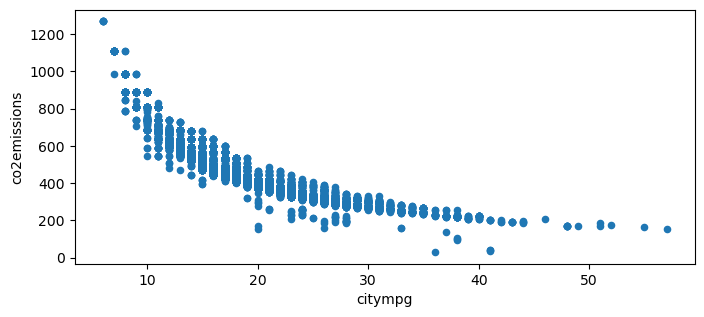

In [487]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'citympg', y = 'co2emissions',figsize = (8,3.3))

#### 2.3 Results and observations

Chart shows that there is a <span style="color:red"> **negative non-linear relationship** </span> between <span style="color:blue"> citympg </span> and <span style="color:red"> co2emissions</span>  
This means that as the <span style="color:red"> citympg increases </span>the co2emissions <span style="color:red"> decreases </span>.


## 3. Prepare the Data

Before building the model, it is necessary to split the data into train and test datasets.  
#### Step 1
1. Start by creating a data frame <span style="color:blue">Y for the dependent variable</span> (this will only be one).  

In [488]:
response = 'co2emissions' # in the variable "response" put the name of the dependent variable
y = df[[response]] # create a single column data frame called y which willl contain the dependent variable
y

,co2emissions
0,555.44
1,555.44
2,484.76
3,424.17
4,555.44
...,...
36951,442.00
36952,466.00
36953,503.00
36954,661.00


#### Step 2
2. Next create another data frame <span style="color:red">X for the independent variables</span> (there can be one or more independent variable).  

In [489]:
predictors = list(df.columns) # lists the columns in the data frame stored in a variable called "predictors"
predictors.remove(response) # from predictors remove the response field
x = df[predictors] # put all the independent variables into a data frame called x
x

,citympg
0,14
1,14
2,18
3,21
4,14
...,...
36951,17
36952,16
36953,15
36954,12


#### Step 3
3. Import the train/test split function from SK Learn model selection sub package.  

In [490]:
from sklearn.model_selection import train_test_split

#### Step 4
4. Split the X and Y data frames into X_Train, X_Test and Y_Train, Y_Test.  

In [491]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234) 

In [492]:
x_train

,citympg
23040,17
35811,15
24533,14
1175,18
17371,22
...,...
32399,23
17048,16
23924,15
34086,17


## 4. Train the Model
To build a Linear Regression Model in Python we need to import the linear regression class from the SK learn linear model sub package.


In [493]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### 4.1. Convert data frame to array

In [494]:
x_train = x_train.to_numpy()
x_train

array([[17],
       [15],
       [14],
       ...,
       [15],
       [17],
       [12]], dtype=int64)

In [495]:
y_train = y_train.to_numpy()
y_train

array([[467.74],
       [523.  ],
       [555.44],
       ...,
       [493.72],
       [467.  ],
       [634.79]])

### 4.2. Fitting a Linear Regression Model

In [496]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

### 4.3.Visualizing results of the linear regression model

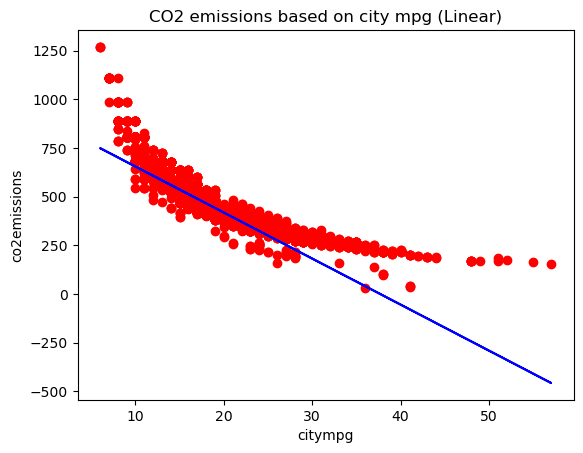

In [497]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train),color='blue')
plt.title("CO2 emissions based on city mpg (Linear)")
plt.xlabel('citympg')
plt.ylabel('co2emissions')
plt.show()

### 4.4. Fitting a Polynomial Regression Model

In [498]:
poly_reg = PolynomialFeatures(degree=4) # model runs better with degree = 4 than 2
X_poly = poly_reg.fit_transform(x_train)
 
x_train #prints x_train 

array([[17],
       [15],
       [14],
       ...,
       [15],
       [17],
       [12]], dtype=int64)

In [499]:
X_poly # prints X_poly

array([[1.0000e+00, 1.7000e+01, 2.8900e+02, 4.9130e+03, 8.3521e+04],
       [1.0000e+00, 1.5000e+01, 2.2500e+02, 3.3750e+03, 5.0625e+04],
       [1.0000e+00, 1.4000e+01, 1.9600e+02, 2.7440e+03, 3.8416e+04],
       ...,
       [1.0000e+00, 1.5000e+01, 2.2500e+02, 3.3750e+03, 5.0625e+04],
       [1.0000e+00, 1.7000e+01, 2.8900e+02, 4.9130e+03, 8.3521e+04],
       [1.0000e+00, 1.2000e+01, 1.4400e+02, 1.7280e+03, 2.0736e+04]])

In [500]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_train)

LinearRegression()

### 4.5. Visualizing the Polynomial Regression model

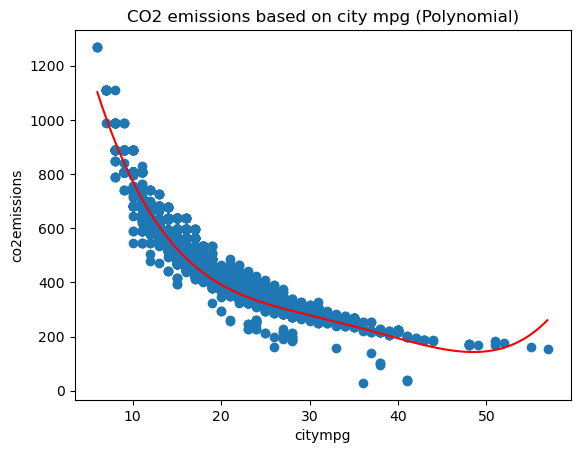

In [501]:
X_grid = np.arange(min(x_train),max(x_train),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(x_train,y_train) 
 
plt.plot( X_grid,lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='red') 
 
plt.title("CO2 emissions based on city mpg (Polynomial)")
plt.xlabel('citympg')
plt.ylabel('co2emissions')
plt.show()

### 5.1 Predicting the result

#### Test 1: Medium 14 mpg city 
Test the value of CO2 emssions against the avearage from the original dataset
2,829 vehicles have an average CO2 emission of 570.33


In [502]:
lin_reg.predict([[14]])

array([[560.48323085]])

In [503]:
lin_reg2.predict(poly_reg.fit_transform([[14]]))

array([[562.75599863]])

#### Result Test1: Medium 14 mpg city

Dataset average at 14 mpg city driving is 570.33

Linear Regression predicts <span style="color:green">**560.48** under reporting by **1.73%**</span>

Polynomial Regression predicts <span style="color:green">**562.75** under reporting by **1.33%**</span>


#### Test 2: High 40 mpg city
Test the value of CO2 emssions against the avearage from the original dataset
18 vehicles have an average CO2 emission of 218.92

In [504]:
lin_reg.predict([[40]])

array([[-54.43691817]])

In [505]:
lin_reg2.predict(poly_reg.fit_transform([[40]]))

array([[193.63706119]])

#### Result Test 2: High 40 mpg city

Dataset average at 40 mpg city driving is 218.92

Linear Regression predicts <span style="color:red">**- 54.44. completely wrong negative city mpg is impossible**</span>

Polynomial Regression predicts <span style="color:green">**193.64** under reporting by **11.55%**</span>


#### Test 3: Low 7 mpg city
Test the value of CO2 emssions against the avearage from the original dataset
24 vehicles have an average CO2 emission of 1105.73

In [506]:
lin_reg.predict([[7]])

array([[726.03865559]])

In [507]:
lin_reg2.predict(poly_reg.fit_transform([[7]]))

array([[1006.7837181]])

#### Result Test 3: Low 7 mpg city

Dataset average at 7 mpg city driving is 1105.73

Linear Regression predicts <span style="color:red">**726.04** under reporting by **34.34%**</span>

Polynomial Regression predicts <span style="color:green">**1006.78** under reporting by **8.95%**</span>


In [508]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [509]:
y_pred = lin_reg2.predict(X_poly) 
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 618.79
R-squared: 0.96


### 6. Summary of conclusions
Result Test1: Medium 14 mpg city - predicts 562.75 under reporting by 1.33%  
Result Test 2: High 40 mpg city - predicts 193.64 under reporting by 11.55%  
Result Test 3: Low 7 mpg city - predicts 1006.78 under reporting by 8.95%  

##### Statistical tests  
Mean squared error: 618.79  
R-squared: 0.96 (96%)  

The model has improved but may lack sufficient predictor variables.